In [14]:
import os
os.chdir("../../")
from PotentialFlowSolver import *

In [15]:
mesh = naca_mesh("0012")

In [16]:
kwargs = {"ylim":[-4,4], "V_inf": 10, "g_div": 5, "write":True,
           "n_airfoil": 200,
           "n_fs": 100,
           "n_bed": 100,
           "n_inlet": 50,
           "n_outlet": 50, "a":1, "b":1}#,"fs_DBC" : np.arange(200)*100}
model = PotentialFlowSolver("0012" , alpha=10, P=2, kwargs = kwargs)

In [17]:
model.solve()

Starting iteration 0
	 dGamma: -7.224701899695399
	 Iteration time: 3.1519277095794678 seconds

Starting iteration 1
	 dGamma: 8.25767625050423
	 Iteration time: 1.3866326808929443 seconds

Starting iteration 2
	 dGamma: -1.1806643186724397
	 Iteration time: 1.3424336910247803 seconds

Starting iteration 3
	 dGamma: 0.16880616756366426
	 Iteration time: 1.3532743453979492 seconds

Starting iteration 4
	 dGamma: -0.02413534586448353
	 Iteration time: 1.3689496517181396 seconds

Starting iteration 5
	 dGamma: 0.00345081301472444
	 Iteration time: 1.3467340469360352 seconds

Starting iteration 6
	 dGamma: -0.0004933838427587314
	 Iteration time: 1.5566556453704834 seconds

Starting iteration 7
	 dGamma: 7.054096233785693e-05
	 Iteration time: 1.332118272781372 seconds

Starting iteration 8
	 dGamma: -1.0085603528481834e-05
	 Iteration time: 1.3377456665039062 seconds

Starting iteration 9
	 dGamma: 1.442015531173498e-06
	 Iteration time: 1.36393404006958 seconds

Starting iteration 10
Sol

In [18]:
nasa =np.array([[0, -3.66423],
[0.00218341, -5.04375],
[0.00873362, -5.24068],
[0.0131004, -4.67125],
[0.0174672, -4.32079],
[0.0480349, -2.74347],
[0.0742358, -2.26115],
[0.0982533, -1.95405],
[0.124454, -1.7345],
[0.146288, -1.55884],
[0.176856, -1.36109],
[0.28821, -1.00829],
[0.320961, -0.941877],
[0.384279, -0.787206],
[0.447598, -0.654432],
[0.515284, -0.543461],
[0.576419, -0.432633],
[0.637555, -0.343703],
[0.700873, -0.254725],
[0.766376, -0.1657],
[0.831878, -0.098572],
[0.893013, -0.00964205],
[0.958515, 0.0793835],
[1, 0.124088]])


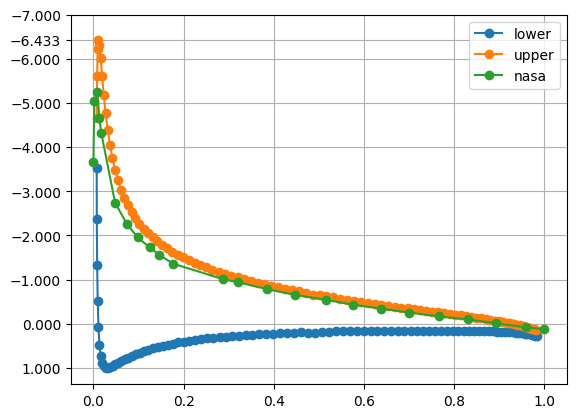

In [19]:
line_clasifier = model.mesh.cell_data_dict["gmsh:physical"]["line"]
naca_points = np.unique(model.mesh.cells_dict["line"][(line_clasifier == 5)])
points = model.mesh.points[naca_points][:,:2]
pressure = np.array(model.pressure_coeff.at(model.mesh.points[naca_points][:,:2]))

#shortening the plot to avoid funny buisness at the trailing edge
points = points[model.kwargs.get("n_airfoil")//30:-model.kwargs.get("n_airfoil")//30]
pressure = pressure[model.kwargs.get("n_airfoil")//30:-model.kwargs.get("n_airfoil")//30]
middle = model.kwargs.get("n_airfoil")//2 - model.kwargs.get("n_airfoil")//30

plt.plot(points[:middle,0][::-1] ,np.flip(pressure[:middle]), label = "lower", marker = "o", color = "C0")
plt.plot(points[middle:,0] ,(pressure[middle:]), label = "upper", marker = "o", color = "C1")
plt.plot(nasa[:,0], nasa[:,1], color = "C2", label = "nasa", marker = 'o')
plt.yticks(np.hstack((np.arange(int(np.min(pressure))-1, 1.1, 1), np.min(pressure))))
plt.legend(loc = "upper right")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [20]:
coords = np.array([233, 234, 237, 240, 241, 244, 245, 248, 251, 254, 255, 258, 259,
       262, 263, 266, 267, 270, 271, 274, 275, 278, 281, 282, 283, 286,
       287, 290, 291, 294, 295, 296, 299, 300, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 315, 316, 317, 318, 319, 322, 323, 324,
       325, 326, 327, 330, 331, 332, 333, 334])

np.min(model.pressure_coeff.at(model.fd_mesh.coordinates.dat.data_ro[coords]))

np.float64(-0.0016221175981553776)

In [21]:
model.fd_mesh.coordinates.dat.data_ro[[331,332]]

array([[11.4784533 ,  2.96655468],
       [11.36918606,  3.09665022]])

In [22]:
model.Gamma

np.float64(-6.320942796428896)

In [23]:
model.lift_coeff

np.float64(1.2641885592857791)

In [24]:
model.lift

np.float64(77.43154925625397)

In [25]:
np.min(model.pressure_coeff.dat.data)

np.float64(-6.442079432468871)

In [26]:
-4.251446823121933

-4.251446823121933